## Task 6:  Prediction Using Decision Tree

## Author : Raj Suryakant Bhor

## GRIP The Sparks Foundation
### In this task we will use Decision Tree Algorithm and predict the species of the flower using their sepal length, width and petal length,width

In [136]:
# importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import r2_score

In [137]:
# importing Data
iris = pd.read_csv('iris.csv',index_col=0)

In [138]:
# checking Data
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [139]:
# Doing Label Encoding on Target
label_encoder = preprocessing.LabelEncoder()
iris['Species']= label_encoder.fit_transform(iris['Species']) 

In [140]:
# spliting Features and Target
x=iris.iloc[:,0:4]
y=iris['Species']

In [141]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [142]:
y

Id
1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species, Length: 150, dtype: int32

In [143]:
# checking Unique Values 
iris['Species'].unique()

array([0, 1, 2])

In [144]:
# counts of the data
iris.Species.value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [145]:
# seeing Column namess
colnames = list(iris.columns)
colnames

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

## Decision Tree Regression 

In [146]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [147]:
array = iris.values
X = array[:,0:3]
y = array[:,3]

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [149]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [150]:
#Find the accuracy
model.score(X_test,y_test)

0.8585514467523112

[Text(0.3395396706586826, 0.9545454545454546, 'X[2] <= 2.6\nsquared_error = 0.601\nsamples = 100\nvalue = 1.204'),
 Text(0.10179640718562874, 0.8636363636363636, 'X[1] <= 3.25\nsquared_error = 0.013\nsamples = 33\nvalue = 0.227'),
 Text(0.03592814371257485, 0.7727272727272727, 'X[1] <= 2.6\nsquared_error = 0.003\nsamples = 14\nvalue = 0.171'),
 Text(0.023952095808383235, 0.6818181818181818, 'squared_error = 0.0\nsamples = 1\nvalue = 0.3'),
 Text(0.04790419161676647, 0.6818181818181818, 'X[0] <= 4.75\nsquared_error = 0.002\nsamples = 13\nvalue = 0.162'),
 Text(0.023952095808383235, 0.5909090909090909, 'X[2] <= 1.2\nsquared_error = 0.001\nsamples = 6\nvalue = 0.183'),
 Text(0.011976047904191617, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 0.1'),
 Text(0.03592814371257485, 0.5, 'squared_error = 0.0\nsamples = 5\nvalue = 0.2'),
 Text(0.0718562874251497, 0.5909090909090909, 'X[2] <= 1.55\nsquared_error = 0.002\nsamples = 7\nvalue = 0.143'),
 Text(0.059880239520958084, 0.5, 'X[1] <= 3.05

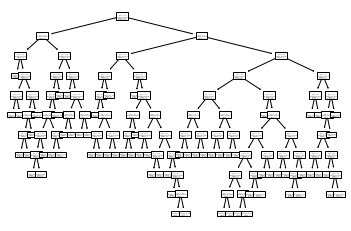

In [151]:
tree.plot_tree(model)

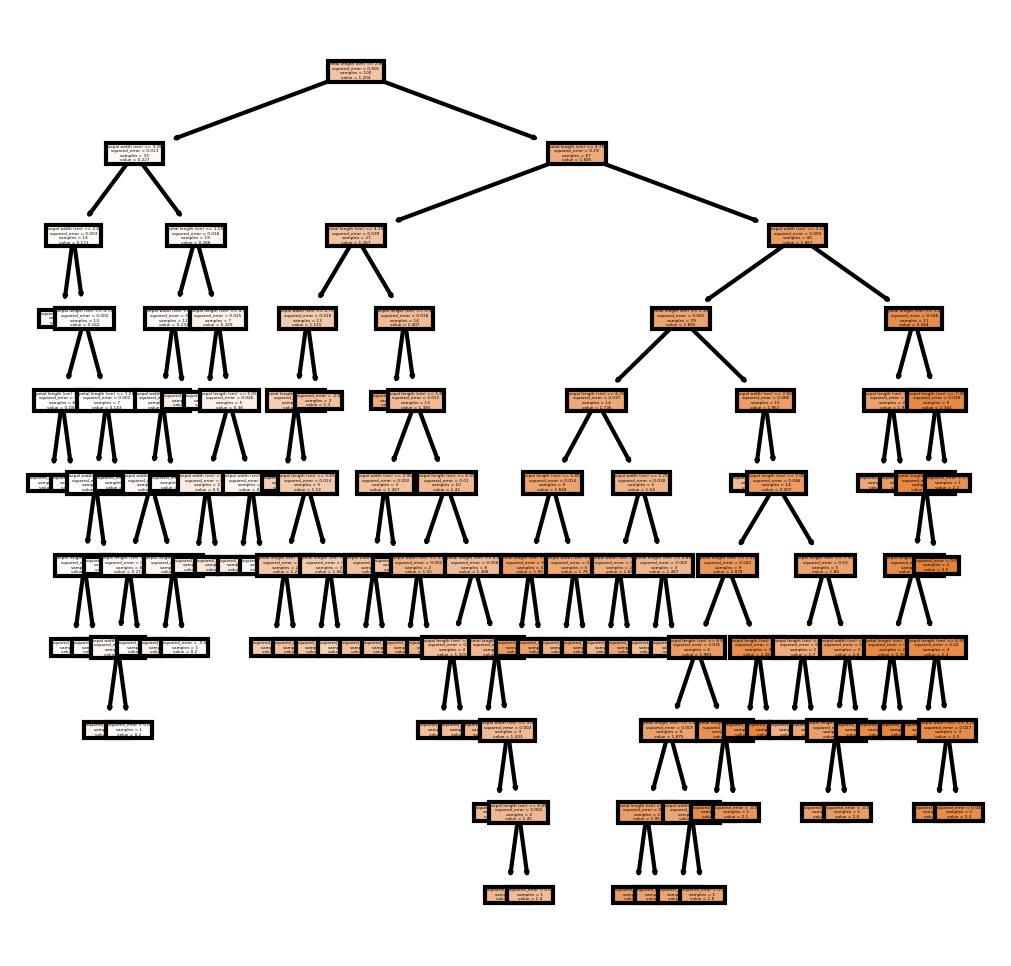

In [152]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);